Input the date in (YYYY-MM-DD) format
2015-10-10
maven_2015-10-10.sts
new


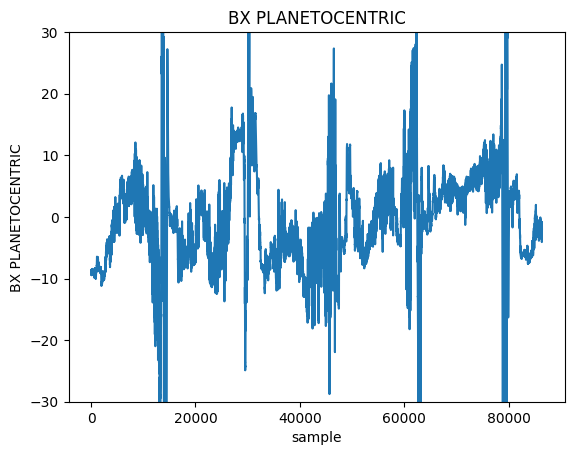

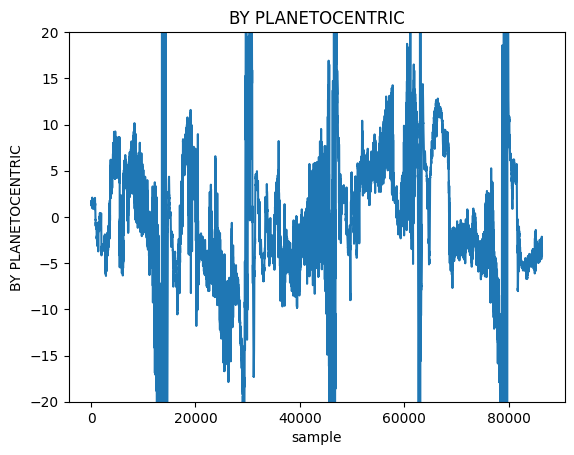

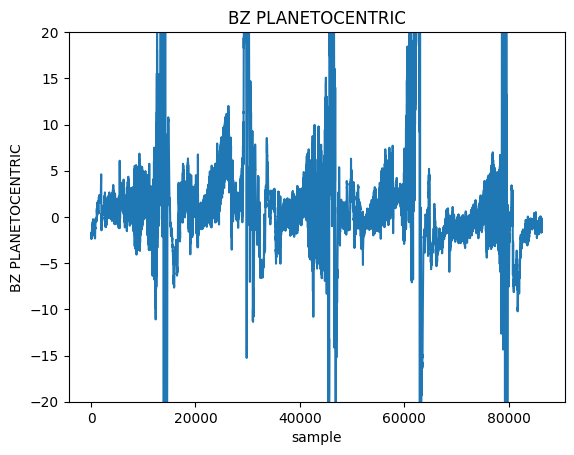

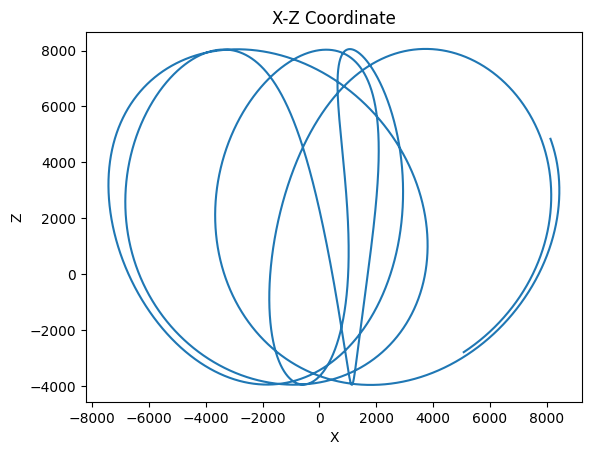

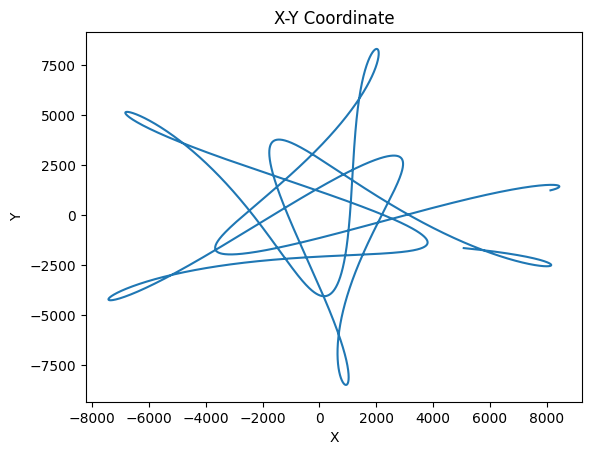

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import log
import numpy as np
np.set_printoptions(precision=10)
from scipy.optimize import curve_fit

print("Input the date in (YYYY-MM-DD) format")
date = input()

f_name = "maven_" + date + ".sts" 
print(f_name)

with open(f_name, 'r') as file:
    # Storing the data in the columns of above file separately 
    column1 = []    # YEAR
    column2 = []    # DAY OF YEAR
    column3 = []    # HOUR
    column4 = []    # MINUTE
    column5 = []    # SECOND
    column6 = []    # MILLISECOND
    column7 = []    # DECIMAL DAY
    column8 = []    # BX PLANETOCENTRIC
    column9 = []    # BY PLANETOCENTRIC
    column10 = []   # BZ PLANETOCENTRIC
    column11 = []   # INSTRUMENT RANGE
    column12 = []   # X
    column13 = []   # Y
    column14 = []   # Z
    column15 = []   # BDX PAYLOAD
    column16 = []   # BDY PAYLOAD
    column17 = []   # BDZ PAYLOAD
    column18 = []   # INSTRUMENT RANGE

    for line in file:
        values = line.strip().split()
        
        column1.append(int(values[0]))
        column2.append(int(values[1]))
        column3.append(int(values[2]))
        column4.append(int(values[3]))
        column5.append(int(values[4]))
        column6.append(int(values[5]))
        column7.append(float(values[6]))
        column8.append(float(values[7]))
        column9.append(float(values[8]))
        column10.append(float(values[9]))
        column11.append(float(values[10]))
        column12.append(float(values[11]))
        column13.append(float(values[12]))
        column14.append(float(values[13]))
        column15.append(float(values[14]))
        column16.append(float(values[15]))
        column17.append(float(values[16]))
        column18.append(float(values[17]))     
        
    # MSO Coordinates of satellite
    x = column12
    y = column13
    z = column14

    # Magnetic field 
    bx = column8
    by = column9
    bz = column10

    # Plotting the magnetic field measured by satellite in MSO coordinates
    plt.figure()
    plt.plot(column8)
    plt.ylim(-30,30)
    plt.title('BX PLANETOCENTRIC')
    plt.xlabel('sample')
    plt.ylabel('BX PLANETOCENTRIC')

    plt.figure()
    plt.plot(column9)
    plt.ylim(-20,20)
    plt.title('BY PLANETOCENTRIC')
    plt.xlabel('sample')
    plt.ylabel('BY PLANETOCENTRIC')

    plt.figure()
    plt.plot(column10)
    plt.ylim(-20,20)
    plt.title('BZ PLANETOCENTRIC')
    plt.xlabel('sample')
    plt.ylabel('BZ PLANETOCENTRIC')

    # Plotting the trajectory of the satellite
    plt.figure()
    plt.plot(column12, column14)
    # plt.ylim(-20,20)
    plt.title('X-Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Z')
        
    plt.figure()
    plt.plot(column12, column13)
    # plt.ylim(-20,20)
    plt.title('X-Y Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')

    # data.columns = ['YEAR', 'DAY OF YEAR', 'HOURS', 'MINUTES', 'SECONDS', 'MILLISECONDS', 'DECIMAL DAY', 'BX PLANETOCENTRIC', 'BY PLANETOCENTRIC', 'BZ PLANETOCENTRIC', 'INSTRUMENT RANGE', 'X', 'Y', 'Z', 'BDX PAYLOAD', 'BDY PAYLOAD', 'BDZ PAYLOAD', 'INSTRUMENT RANGE']  # Replace with your actual column names

print("new")

Text(0, 0.5, 'BZ PLANETOCENTRIC')

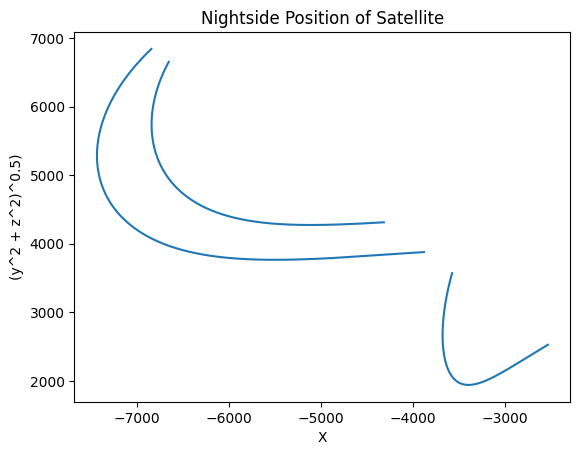

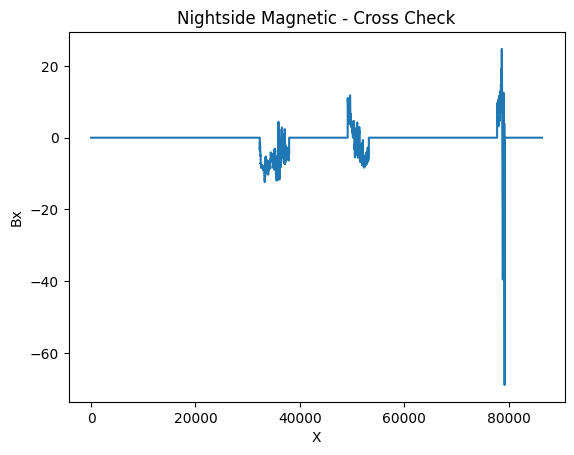

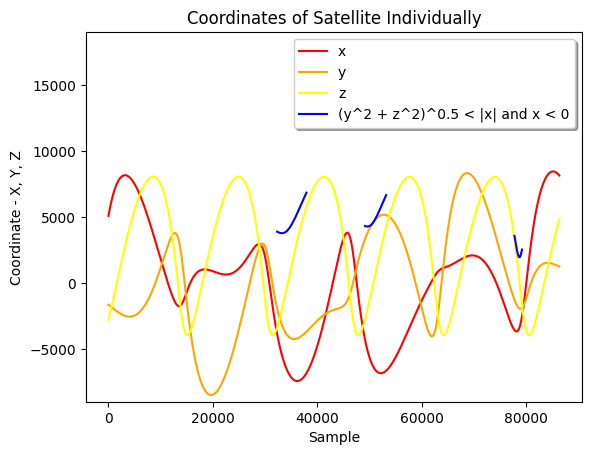

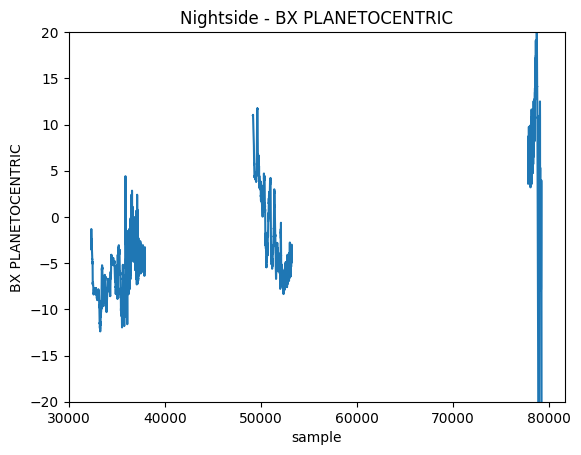

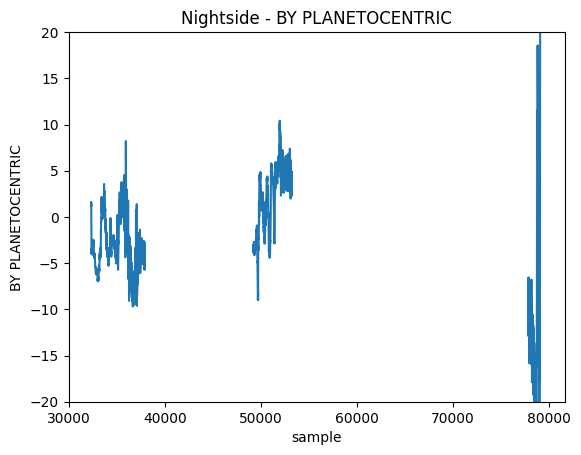

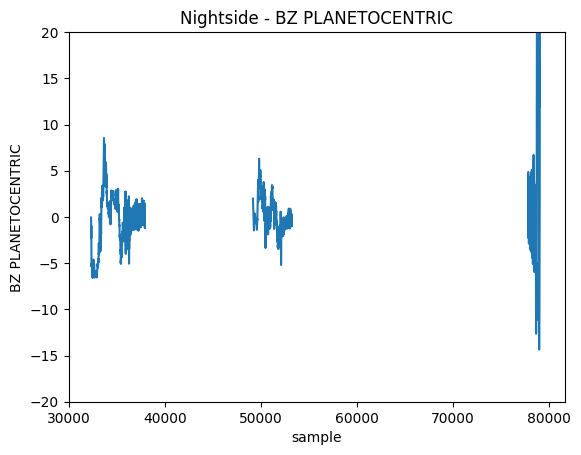

In [ ]:
# Separating the nightside magnetic field regions only
#n = len(column1)
#n = 86399   # should update datewise but this is the lowest number seen so far

if date == "2015-04-01":
    n = 86399

elif date == "2015-04-17":
    n = 86402

elif date == "2015-04-21":
    n = 86398

elif date == "2015-05-01":
    n = 86400

elif date == "2015-05-08":
    n = 86399

elif date == "2015-09-15":
    n = 86401

elif date == "2015-09-20":
    n = 86401

elif date == "2015-09-30":
    n = 86399

elif date == "2015-10-10":
    n = 86402

bx_night = np.zeros(n)
by_night = np.zeros(n)
bz_night = np.zeros(n)
nightside = np.zeros(n)
a = 1
i = 0

# Cross Check Test ---------------------
yz = np.zeros(n)
yz_cond = np.zeros(n)
bx_night_check = np.zeros(n)

for i in range(n):
    yz[i] = np.sqrt(y[i]**2 + z[i]**2)
    if abs(x[i]) < yz[i] or x[i] > 0:
        yz[i] = np.NAN
    else:
        bx_night_check[i] = bx[i]

# Plotting the trajectory of the satellite
plt.figure()
plt.plot(x, yz)
# plt.ylim(-20,20)
plt.title('Nightside Position of Satellite')
plt.xlabel('X')
plt.ylabel('(y^2 + z^2)^0.5)')

# Plotting the trajectory of the satellite
plt.figure()
plt.plot(bx_night_check)
#plt.ylim(-1000,1000)
plt.title('Nightside Magnetic - Cross Check')
plt.xlabel('X')
plt.ylabel('Bx')

# Plotting the trajectory of the satellite
plt.figure()
plt.plot(x, label = 'x', color = 'red')
plt.plot(y, label = 'y', color = 'orange')
plt.plot(z, label = 'z', color = 'yellow')
plt.plot(yz, label = '(y^2 + z^2)^0.5 < |x| and x < 0', color = 'blue')
plt.legend(['x', 'y', 'z', '(y^2 + z^2)^0.5 < |x| and x < 0'], loc='upper right', shadow = True)
plt.title('Coordinates of Satellite Individually')
plt.xlabel('Sample')
plt.ylabel('Coordinate - X, Y, Z')
plt.ylim(-9000, 19000)


# Cross check end --------------------------------

for i in range(n):
    # Condition satisfied by nightside magnetic field: x < 0, |x| > (y^2 + z^2)^0.5 
    if (column12[i] < 0) and (abs(column12[i]) > np.sqrt(column13[i]**2 + column14[i]**2)):
        bx_night[i] = column8[i]
        by_night[i] = column9[i]
        bz_night[i] = column10[i]
        nightside[i] = 1
    else:
        bx_night[i] = np.NAN
        by_night[i] = np.NAN
        bz_night[i] = np.NAN

# Plotting Nightside magnetic field only
plt.figure()
plt.plot(bx_night)
plt.ylim(-20,20)
plt.title('Nightside - BX PLANETOCENTRIC')
plt.xlabel('sample')
plt.ylabel('BX PLANETOCENTRIC')

plt.figure()
plt.plot(by_night)
plt.ylim(-20,20)
plt.title('Nightside - BY PLANETOCENTRIC')
plt.xlabel('sample')
plt.ylabel('BY PLANETOCENTRIC')

plt.figure()
plt.plot(bz_night)
plt.ylim(-20,20)
plt.title('Nightside - BZ PLANETOCENTRIC')
plt.xlabel('sample')
plt.ylabel('BZ PLANETOCENTRIC')


done
done
done


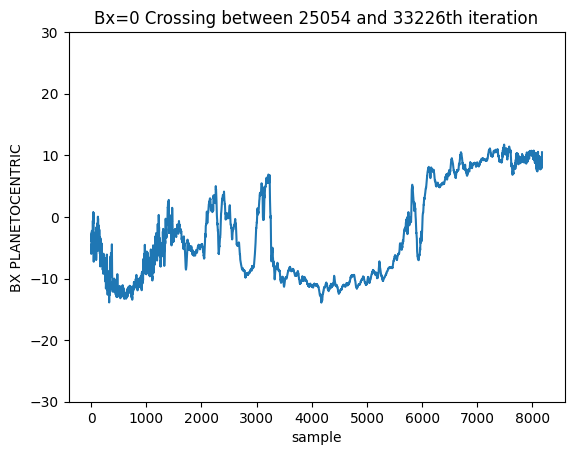

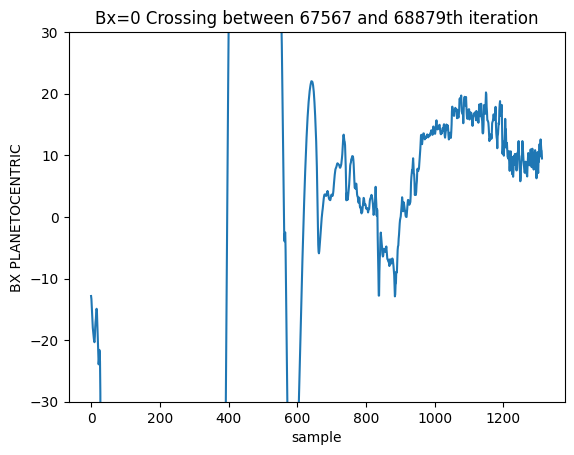

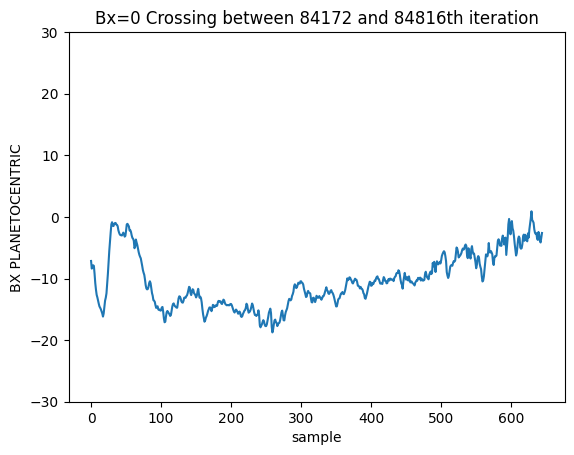

In [ ]:

#
# Bx = 0 crossing
# First and the last index of a subinterval 
start = 0
end = 0

for j in range(n-1):
    # Creating interv to store small sub intervals of Nightside Bx 
    if (nightside[j] == 0) and (nightside[j+1] == 1):
        start = j+1

    if (nightside[j] == 1) and (nightside[j+1] == 0):
        end = j
        len = end - start + 1
        interv = bx_night[start:end+1]

        
        if (np.max(interv) - np.min(interv) > 6):
            
            # Plotting individual big sub intervals
            if np.max(interv) < 20 and np.min(interv) > -20:
                plt.figure()
                plt.plot(interv)
                plt.ylim(-30,30)
                plt.title('Bx=0 Crossing between ' + str(start)+ ' and ' + str(end) + 'th iteration')
                plt.xlabel('sample')
                plt.ylabel('BX PLANETOCENTRIC')
            else:
                plt.figure()
                plt.plot(interv)
                plt.ylim(-30,30)
                plt.title('Bx=0 Crossing between ' + str(start)+ ' and ' + str(end) + 'th iteration')
                plt.xlabel('sample')
                plt.ylabel('BX PLANETOCENTRIC')

            print("done")


([25054, 25055, 25056, 25057, 25058, 25059, 25060, 25061, 25062, 25063, 25064, 25065, 25066, 25067, 25068, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 25076, 25077, 25078, 25079, 25080, 25081, 25082, 25083, 25084, 25085, 25086, 25087, 25088, 25089, 25090, 25091, 25092, 25093, 25094, 25095, 25096, 25097, 25098, 25099, 25100, 25101, 25102, 25103, 25104, 25105, 25106, 25107, 25108, 25109, 25110, 25111, 25112, 25113, 25114, 25115, 25116, 25117, 25118, 25119, 25120, 25121, 25122, 25123, 25124, 25125, 25126, 25127, 25128, 25129, 25130, 25131, 25132, 25133, 25134, 25135, 25136, 25137, 25138, 25139, 25140, 25141, 25142, 25143, 25144, 25145, 25146, 25147, 25148, 25149, 25150, 25151, 25152, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25162, 25163, 25164, 25165, 25166, 25167, 25168, 25169, 25170, 25171, 25172, 25173, 25174, 25175, 25176, 25177, 25178, 25179, 25180, 25181, 25182, 25183, 25184, 25185, 25186, 25187, 25188, 25189, 25190, 25191, 25192, 25193, 25194, 25195, 2519

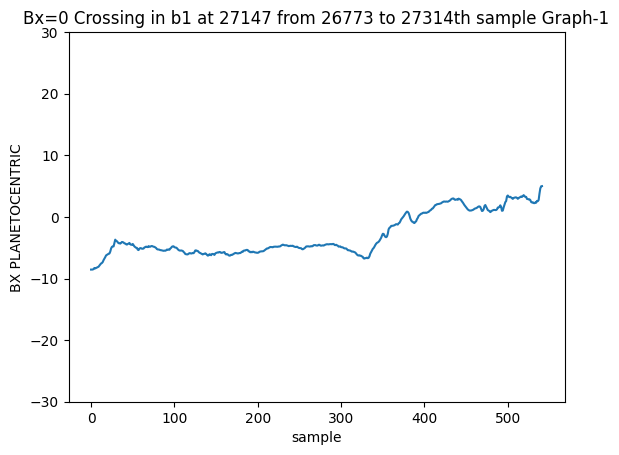

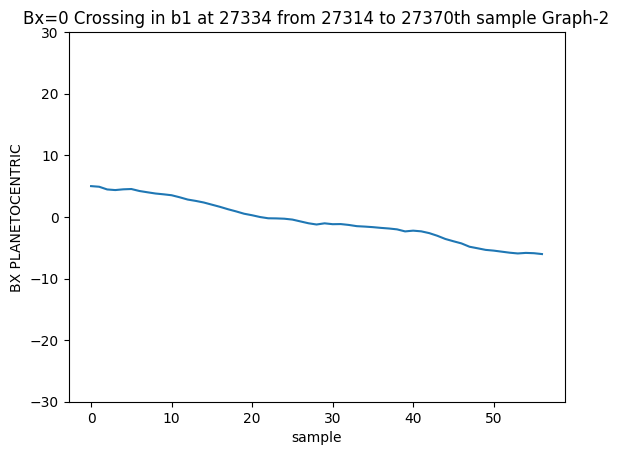

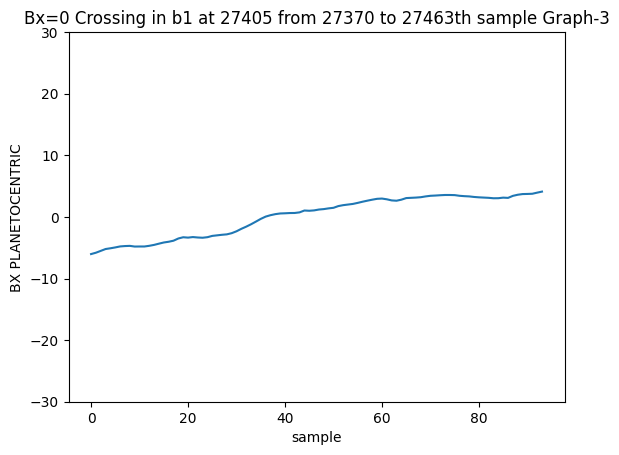

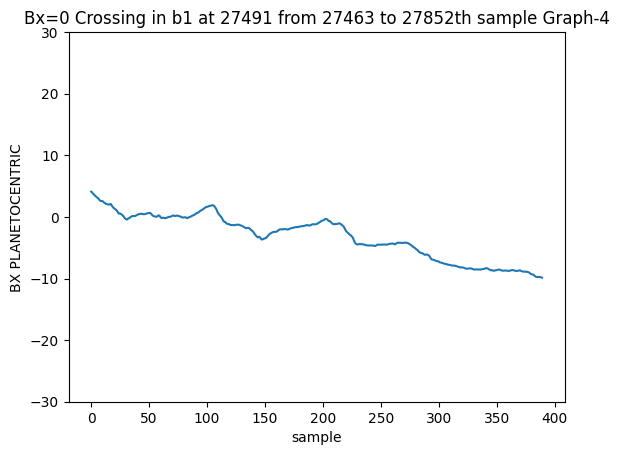

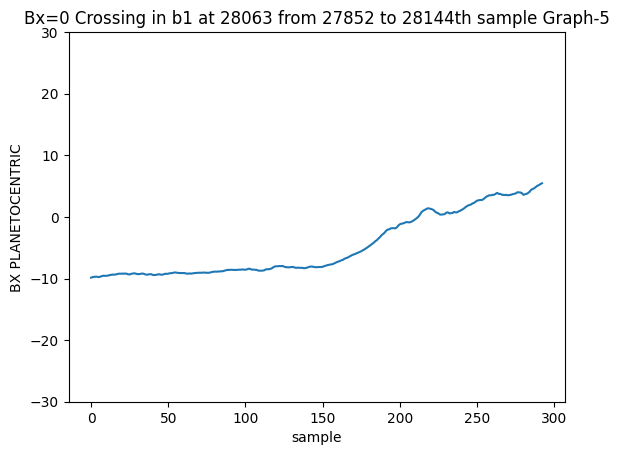

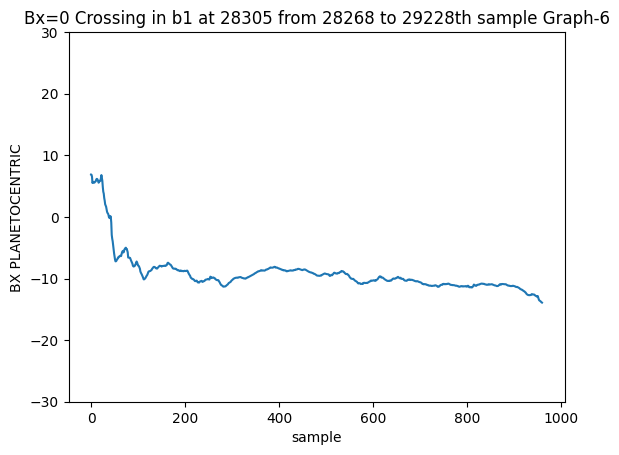

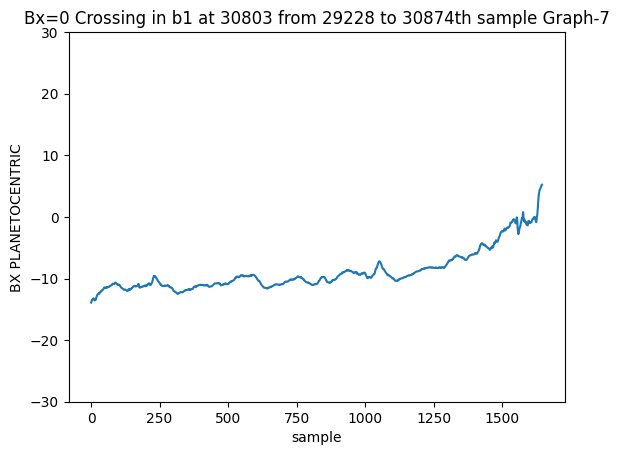

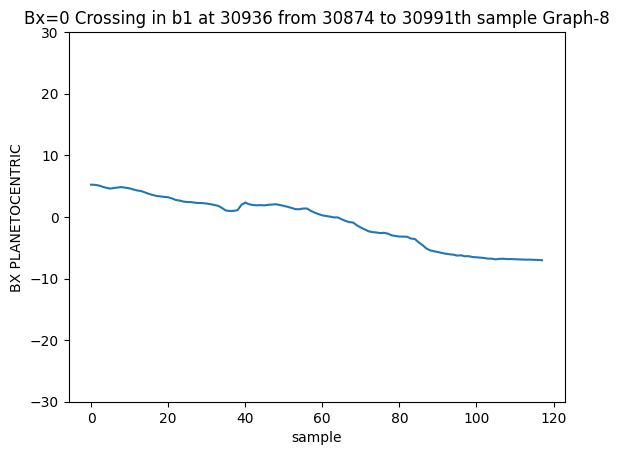

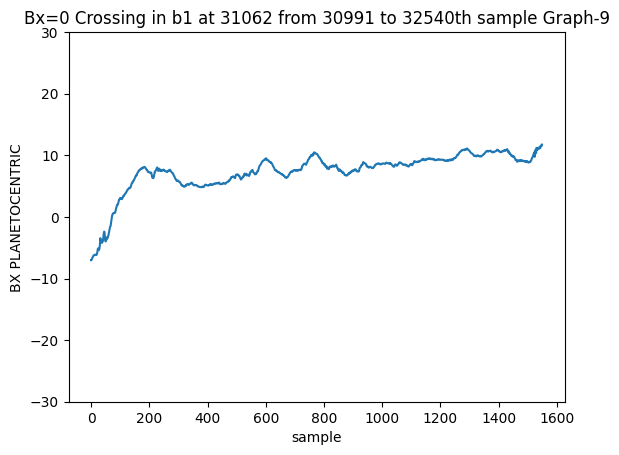

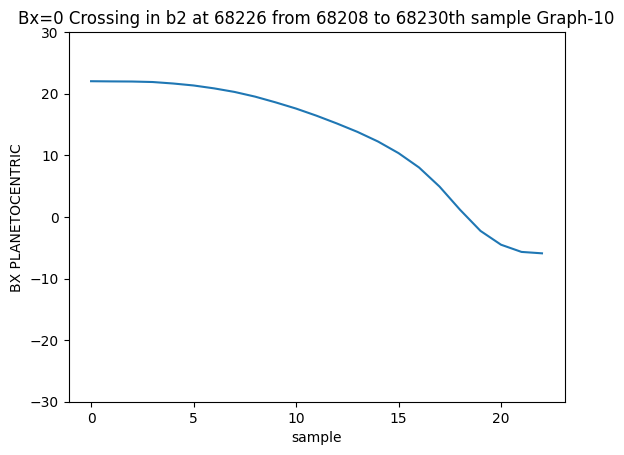

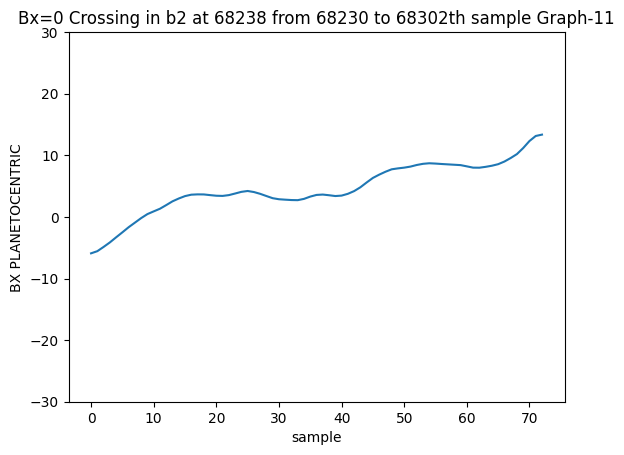

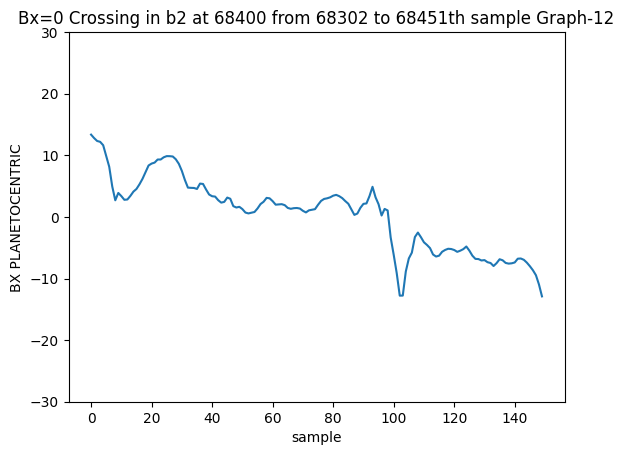

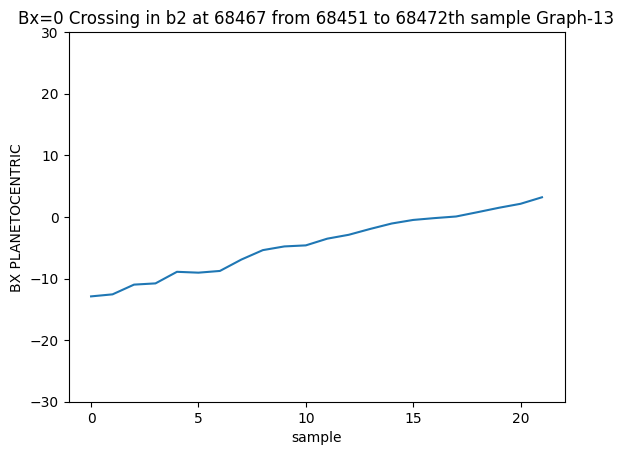

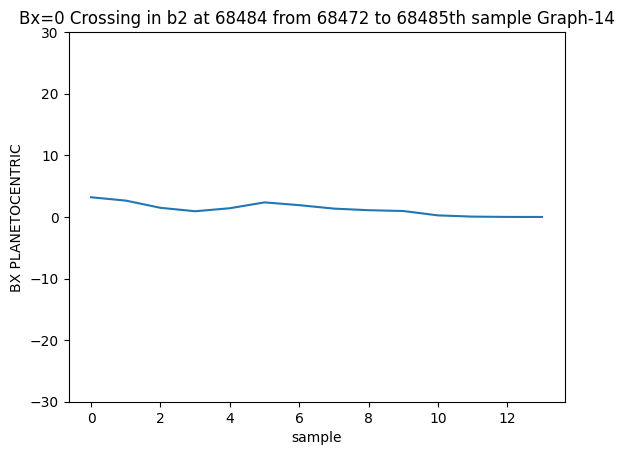

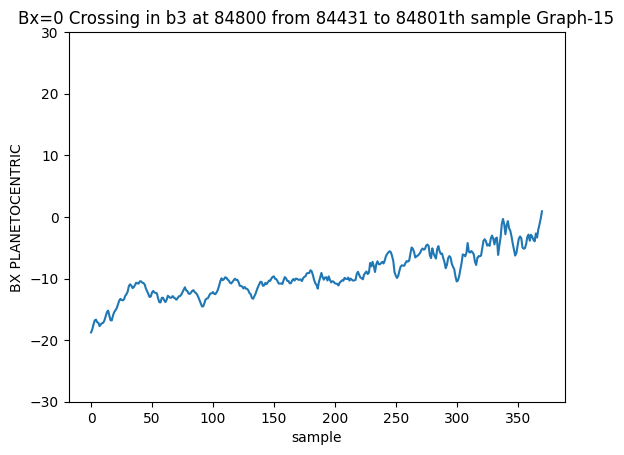

In [ ]:
import numpy as np


# Points of interest for Bx crossing (by eye-picking points in above graphs)
# Intervals corresponding to different dates

if date == "2015-04-01":
    b1 = list(range(1500+41351, 3000+41351))
    len_b1 = b1[-1] - b1[0] + 1

    sub = (b1, b1)

elif date == "2015-04-17":
    b1 = list(range(20710, 20710+175))
    b2 = list(range(375+20710, 475+20710))
    b3 = list(range(700+20710, 21636))
    b4 = list(range(600+37060, 38196))
    b5 = list(range(2000+73821, 82218))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1
    len_b3 = b3[-1] - b3[0] + 1
    len_b4 = b4[-1] - b4[0] + 1
    len_b5 = b5[-1] - b5[0] + 1
    
    sub = (b1, b2, b3, b4, b5)

elif date == "2015-04-21":
    b1 = list(range(29453, 90+29453))
    b2 = list(range(45690, 115+45690))
    b3 = list(range(500+45690, 46801))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1
    len_b3 = b3[-1] - b3[0] + 1

    sub = (b1, b2, b3)

elif date == "2015-05-01":
    b1 = list(range(5073, 12286))
    b2 = list(range(50+63362, 150+63362))
    b3 = list(range(690+63362, 64744))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1
    len_b3 = b3[-1] - b3[0] + 1

    sub = (b1, b2, b3)

elif date == "2015-05-08":
    b1 = list(range(25054, 33226))
    b2 = list(range(620+67567, 68879))
    b3 = list(range(84172, 84816))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1
    len_b3 = b3[-1] - b3[0] + 1

    sub = (b1, b2, b3)

elif date == "2015-09-15":
    b1 = list(range(600+66315, 422+66988))
    len_b1 = b1[-1] - b1[0] + 1

    sub = (b1, b1)

elif date == "2015-09-30":
    b1 = list(range(41847+800, 41847+1300))
    b2 = list(range(77625, 77625+2000))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1

    sub = (b1, b2)

elif date == "2015-09-20":
    b1 = list(range(870+7153, 1250+7153))
    b2 = list(range(1250+36001, 37711))
    b3 = list(range(400+53096, 1150+53096))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1
    len_b3 = b3[-1] - b3[0] + 1

    sub = (b1, b2, b3)

elif date == "2015-10-10":
    b1 = list(range(3500+32326, 37936))
    b2 = list(range(1000+49168, 2500+49168))
    b3 = list(range(1200+77801, 79244))
    len_b1 = b1[-1] - b1[0] + 1
    len_b2 = b2[-1] - b2[0] + 1
    len_b3 = b3[-1] - b3[0] + 1

    sub = (b1, b2, b3)

print(sub)

max_ind = 0
min_ind = 0
num = 0
gn = 0
graph_num = 0

# Finding smooth portions of curves which also have the Bx = 0 crossing and is in between one maxima and minima.
# Part #1
# Logic is that just before dip (nature[p]=-1), there should be a maxima and after there should be a minima, both of magnitude more than 3.
# Similarly for rise (nature[p]=1), there should be a minima before and maxima after. Now, it can be possible that there are multiple extrema
# between these crossing points. So, if between two crossing points, if extrema is not more than 3, then the second crossing point
# is ignored as it is due to noisy nature of curve, and thus, we ignore present crossing point and move to the next crossing point. However, if the
# magniture is more than 3, then nature[p] is updated and start is updated to represent the index of present crossing point. Again, the above cycle
# is repeated to get all the extremas just before the crossing points, and the crossing points that are valid. We are aiming to find the global 
# extrema initially before each crossing point, and then through the conditions we can further filter out whether we want to take global or local extrema

# Part #2
# Once this is done, again you go to each Bx crossing point and then try to find the Bx crossing point next to it. If, they both are of same nature, then
# put nature[p]=0 for the last point and continue. Else, we find the maxima (minima) just before the dip (rise) and the minima (maxima) just after it. We store
# the indices of these extremum points and the Bx crossing point and we use this information for plotting the portions/sub intervals
 
for b in sub:
    num = num + 1
    if b == b1:
        length = len_b1
    elif b == b2:
        length  = len_b2
    elif b == b3:
        length = len_b3
    elif b == b4:
        length = len_b4
    elif b == b5:
        length = len_b5
    else:
        length = len_b6



    nature = np.zeros(length)   # to store nature of Bx at indices where they happen: 
    # -1 - dip to -ve axis, +1 - rise to +ve axis, -2 - minima, +2 - maxima
    
    for m in b:
        # updating nature to store Bx=0 crossing points, -1 - dip, +1 - rise
        if (bx_night[m] >= 0 and bx_night[m+1] < 0) or (bx_night[m] <= 0 and bx_night[m+1] > 0):
            if (bx_night[m] >= 0 and bx_night[m+1] < 0):    # curve becoming -ve from +ve: dip
                nature[m - b[0]] = -1
            if (bx_night[m] <= 0 and bx_night[m+1] > 0):    # curve becoming +ve from -ve: rise 
                nature[m - b[0]] = 1

    # Part #1
    # In each interval, removing extra Bx crossing point due to noisy nature, and local minimas and maximas
    start = 0       # to consider it to be start of first interval or portion of curve
    later = False   # to exclude the first Bx crossing point

    # Updating nature to store -2 for minimas and +2 for maximas (only for extremas with magnitude equal or more than 3)
    for i in range(length):
        # start is updated such that it stores the value of last extrema before a Bx crossing point, then p_len is used from start to the next extrema point

        if nature[i] != 0:

            if nature[i] == -1:
                # if above, then just before this there should be a maxima
                maximum = max(bx_night[b[start:i]])     # Finding global maxima between present and last nature[i]=+1 or -1 point
                if later and maximum < 2.9:     # ignoring the first portion too as there might be monotonic nature so extrema is on ends
                    nature[i] = 0       # if there are no maximas more than 3, then that bx crossing point can be skipped as it is there due to noisy nature of curve
                    continue
                else:       
                    # only updating nature matrix for extrema more than 3 (~2.9)
                    p_len = i - start           # + 1 won't be there as confirmed during debugging
                    b_p = np.zeros(p_len)       # creating b_p to store the Bx values for the portion between start (last Bx crossing) and present Bx crossing point
                    for r in range(p_len):
                        b_p[r] = bx_night[b[start + r]]     # storing bx_night values in b_p variable
                    max_ind = list(b_p).index(maximum)      # storing index of maxima (which is more than 3)
                    if maximum != bx_night[b[start + max_ind]]:
                        print("ERROR")      # just a check
                    nature[start + max_ind] = 2     # point of maxima
                    start = i

            elif nature[i] == 1:
                # if above, then just before this there should be a minima
                minimum = min(bx_night[b[start:i]])     # Finding global maxima between present and last nature[i]=+1 or -1 point
                print(bx_night[b[start:i]])

                if later and minimum > -2.9:    # ignoring the first portion too as there might be monotonic nature so extrema is on ends
                    nature[i] = 0       # if there are no minima less than -3, then that bx crossing point can be skipped as it is there due to noisy nature of curve
                    continue
                else:
                    # only updating nature matrix for extrema less than -3 (~-2.9)
                    print(str(minimum) + " minimum")
                    p_len = i - start           # + 1 won't be there as confirmed during debugging
                    b_p = np.zeros(p_len)       # creating b_p to store the Bx values for the portion between start (last Bx crossing) and present Bx crossing point
                    
                    for r in range(p_len):
                        b_p[r] = bx_night[b[start + r]]     # storing bx_night values in b_p variable
                    #if i == 199:
                        #breakpoint()
                    min_ind = list(b_p).index(minimum)      # storing index of minima (which is less than -3)
                    if minimum != bx_night[b[start + min_ind]]:
                        print("ERROR")      # just a check
                    nature[start + min_ind] = -2    # point of minima
                    start = i
            later = True

            
    print("filter")

    # Part #2
    for p in range(length):
        
        last = 0
        # print(p)
        
        if (nature[p] == 1) or (nature[p] == -1):
            for q in range((p+1),length):   # Starting from one Bx crossing and trying to reach the second Bx crossing point
                if (nature[q] == 1) or (nature[q] == -1) or (q == length-1):
                    #print(str(nature[p]) + ' ' + str(nature[q]))
                    if nature[p] == nature[q]:
                        # if there are two dips or rise next to each other, then, you drop the previous bx crossing by making nature[p]=0

                        nature[p] = 0
                        p = q - 1
                        # print(str(p) + "-p and q-" + str(q))
                        break
                    
                    else:                                 
                        # if there is an alternative rise and dip or vice-versa
                        # print("nature at p " + str(nature[p]))
                        ext_ind1 = 0    # index of previous extremum
                        ext_ind2 = 0    # index of next extremum (trying to find the portion of curve that is having Bx crossing point)
                        update1 = False     # check that at the end that ext_ind1 got updated for portion of curve or not
                        update2 = False     # check that at the end that ext_ind2 got updated for portion of curve or not

                        # create sub intervals 
                        if nature[p] == -1:
                            for r in range(last, p):
                                # finding the maxima just before dip point
                                if nature[r] == 2:
                                    ext_ind1 = r
                                    update1 = True
                                    last = p

                            # check
                            if ~update1 and last == 0:
                                # if above doesn't update, then storing index of global maxima in ext_ind1 
                                temp = bx_night[b[last:p]]  # last - r
                                
                                ext_ind1 = list(temp).index(max(temp))
                                update1 = True
                                last = p
                                break
                            
                            pfin = p    # storing Bx crossing point index for plot
                            print(str(ext_ind1) + ' ext_ind1' )


                            for s in range(p+1, length):
                                # finding minima just after dip point
                                if nature[s] == -2:
                                    ext_ind2 = s
                                    update2 = True
                                    if ext_ind2 < ext_ind1:
                                        print("ERROR " + str(p))
                                    
                                    p = ext_ind2
                                    break
                                    
                                elif s == length - 1:
                                    temp = bx_night[b[p+1:length]]
                                    ext_ind2 = p + 1 + list(temp).index(min(temp))
                                    update2 = True
                                    if ext_ind2 < ext_ind1:
                                        print("ERROR last " + str(s))

                                    break
                        

                        elif nature[p] == 1:
                            # finding the minima just before rise point
                            for r in range(last, p):
                                
                                if nature[r] == -2:
                                    ext_ind1 = r
                                    update1 = True
                                    last = p - 1 
                                
                            # if above doesn't update, then storing index of global maxima in ext_ind1 
                            # check
                            if ~update1 and  r == 0:
                                temp = bx_night[b[last:p]]  # last - r
                                ext_ind1 = list(temp).index(min(temp))
                                update1 = True
                                last = p
                                break

                            pfin = p
                            print(str(ext_ind1) + ' ext_ind1' )

                            for s in range(p+1, length):
                                # finding maxima just after rise point
                                if nature[s] == 2:
                                    ext_ind2 = s
                                    update2 = True
                                    if ext_ind2 < ext_ind1:
                                        print("ERROR " + str(p))
                                    
                                    p = ext_ind2
                                    break

                                elif s == length - 1:
                                    temp = bx_night[b[p+1:length]]
                                    ext_ind2 = p + 1 + list(temp).index(max(temp)) 
                                    update2 = True
                                    if ext_ind2 < ext_ind1:
                                        print("ERROR last " + str(s))

                                    break
                        

                        # print(ext_ind1)
                        # print(ext_ind2)
                        if update1 and update2:
                            # if both the extremum indices got updated then we can draw the plot
                            # temp3 = bx_night[b[ext_ind1:ext_ind2]]
                            # if max(temp3) >=3 and max(temp3) < 20 and min(temp3) <= -3 and min(temp3) > -20:
                            update1 = False
                            update2 = False
                            gn = gn+1
                            print("yo yo " + str(gn))
                            plt.figure()
                            plt.plot(bx_night[b[ext_ind1:ext_ind2+1]])
                            plt.ylim(-30,30)
                            plt.title('Bx=0 Crossing in b' + str(num) + ' at ' + str(b[pfin]) + ' from ' + str(b[ext_ind1])+ ' to ' + str(b[ext_ind2]) + 'th sample Graph-' + str(gn))
                            plt.xlabel('sample')
                            plt.ylabel('BX PLANETOCENTRIC')
                            
                
                        break
            continue
    
                 

    print("filter end")





[10.3591329307  1.395137103   0.2485069056]
(array([0.8314366452, 0.5203342813, 0.1948469677]), array([ 0.2153060019, -0.6250101282,  0.7503370344]), array([-0.5122074097,  0.5819059851,  0.6316874179]))
done
Crossing point 27147: x = -8575.375, y = -364.546, z = 3936.412 |Bl| = 0.06930269260760355
[11.8053678495  1.3714416662  0.3135327356]
(array([ 0.9601521207, -0.277079644 ,  0.0365345871]), array([0.1105429834, 0.4965777852, 0.8609243591]), array([-0.2566868793, -0.8225797069,  0.507419424 ]))
done
Crossing point 27334: x = -8715.108, y = -343.127, z = 3690.468 |Bl| = 0.7886434639928518
[11.2994767493  0.6221263744  0.1068709426]
(array([-0.9639281664,  0.24115843  , -0.1126281568]), array([0.1547995901, 0.8521795604, 0.4998270538]), array([ 0.2165169207,  0.464362583 , -0.8587711072]))
done
Crossing point 27405: x = -8764.386, y = -333.909, z = 3595.356 |Bl| = 0.631037471642451
[13.4422042848  3.4365220339  1.839679017 ]
(array([ 0.984889628 , -0.1694841241,  0.035602701 ]), arra

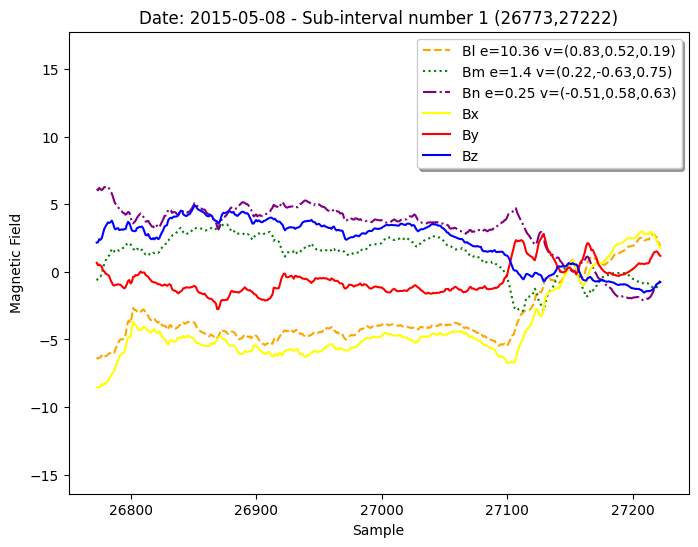

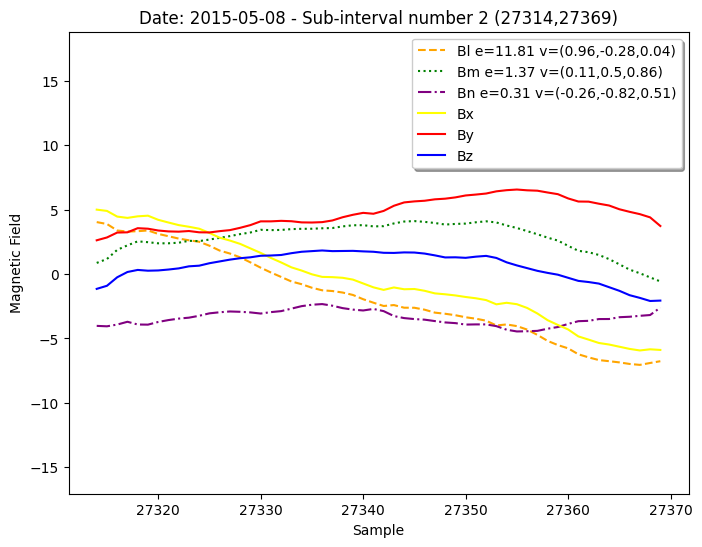

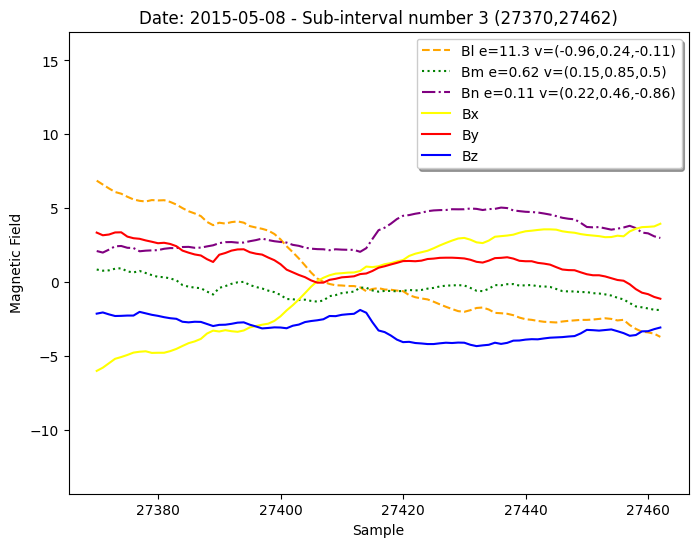

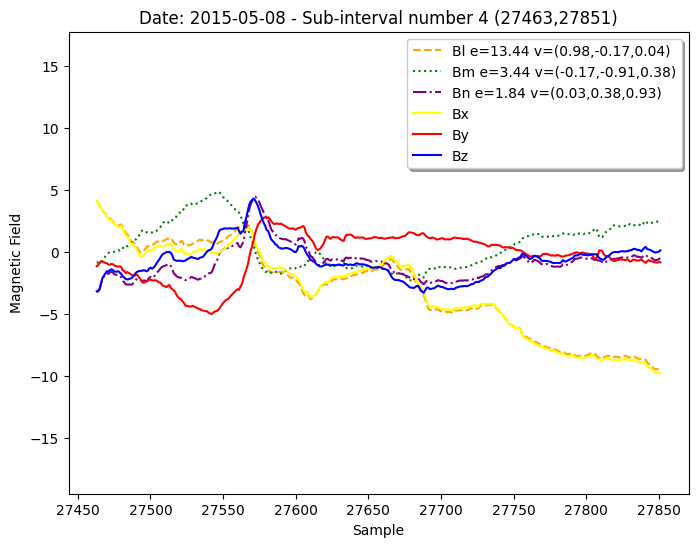

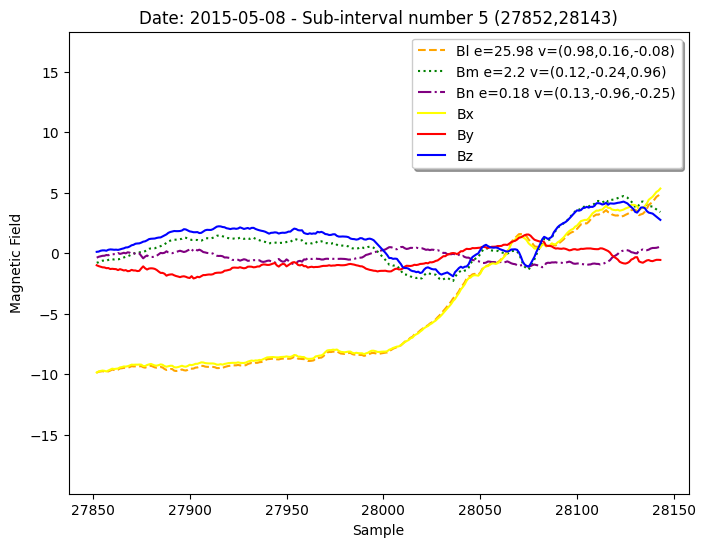

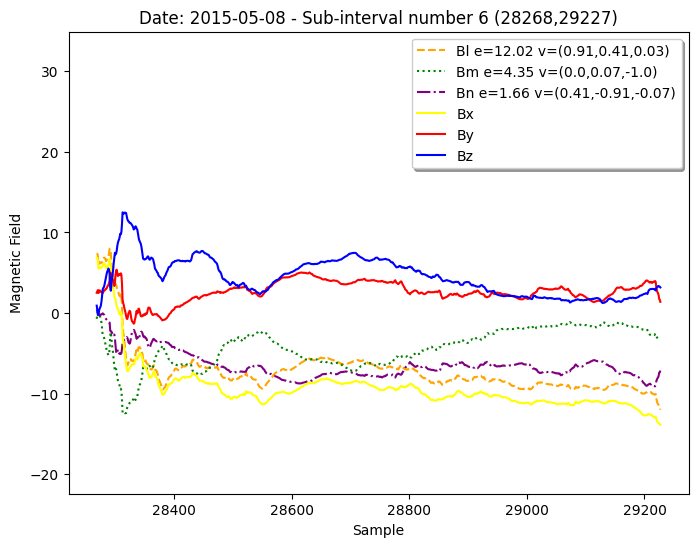

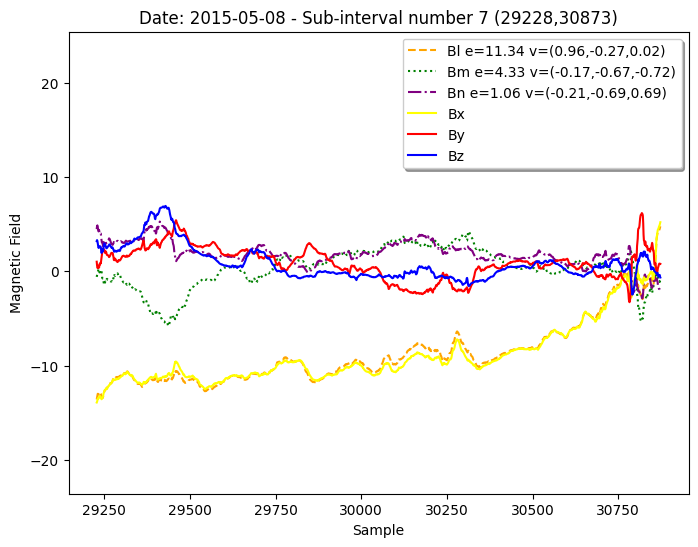

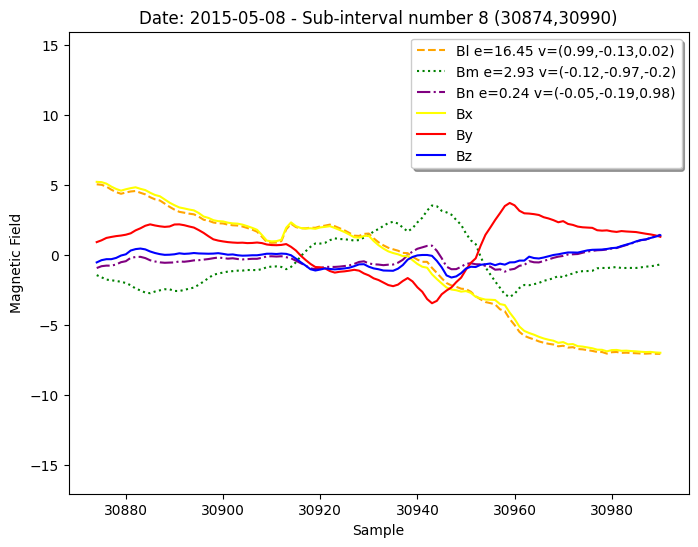

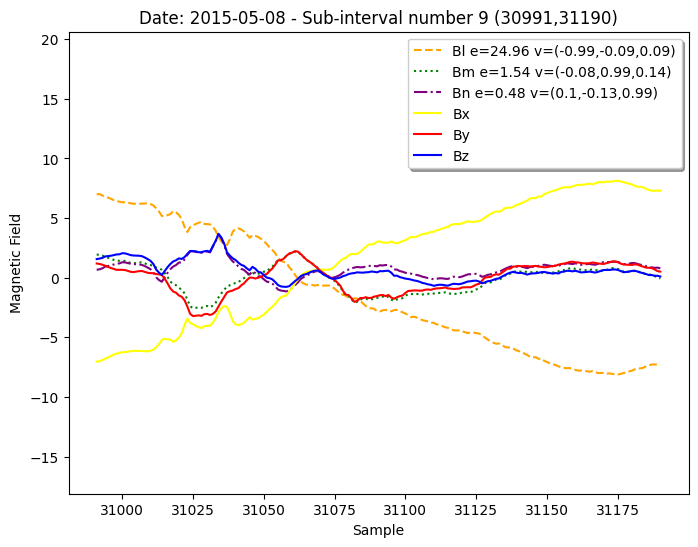

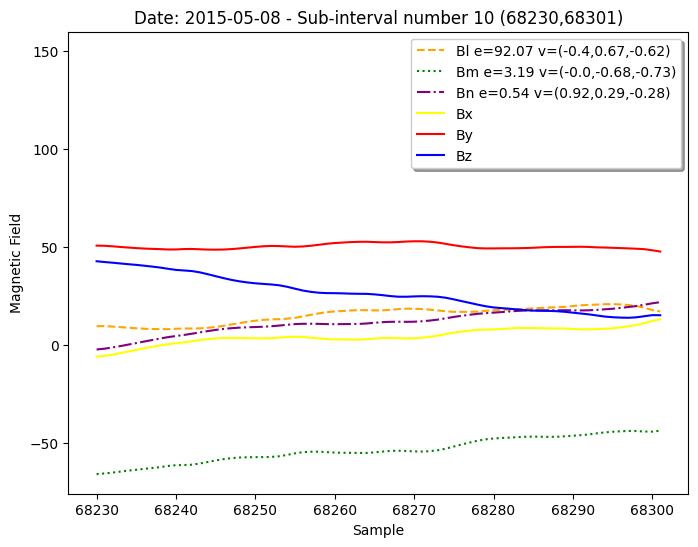

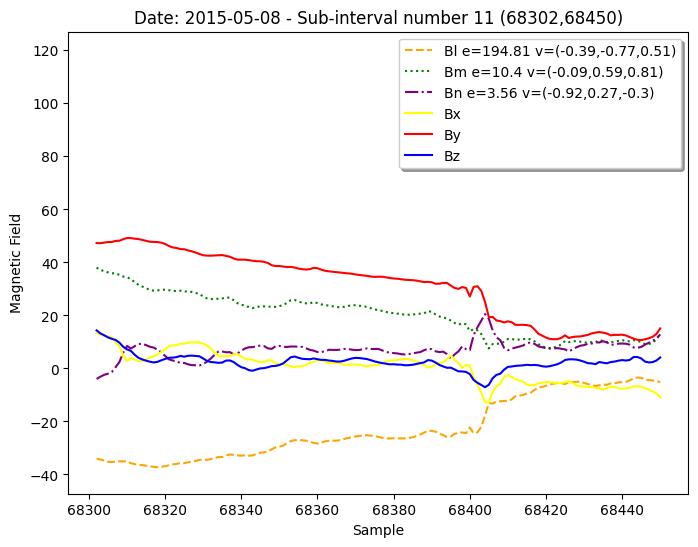

In [ ]:
from numpy.linalg import eig

# Picking up the smooth sub intervals from each of the above plots such that the Bx crossing point is contained 
# and end points are of magnitude more than 3

if date == "2015-04-01":
    g1 = list(range(43248, 560+42882))

    g = (g1, g1)
    p_cross = [43330]

elif date == "2015-04-17":
    g1 = list(range(40+20751, 110+20751))
    g2 = list(range(21410, 21495))
    g3 = list(range(37677, 37756))
    g4 = list(range(37791, 38191))
    g5 = list(range(76525, 77865))
    g6 = list(range(80084, 80364))
    g7 = list(range(80364, 80421))

    g = (g1,g2,g3,g4,g5,g6,g7)
    p_cross = [20794, 21461, 37741, 37805, 77207, 80136, 80379]

elif date == "2015-04-21":
    g1 = list(range(10+45696, 90+45696))
    g2 = list(range(46210, 105+46210))

    g = (g1, g2)
    p_cross = [45767, 46227]

elif date =="2015-05-01":
    g1 = list(range(7850, 9180))
    g2 = list(range(9180, 2000+9180))
    g3 = list(range(63435, 63487))
    g4 = list(range(64170, 250+64170))

    g = (g1,g2,g3,g4)
    p_cross = [7867, 10699, 63456, 64262]


elif date == "2015-05-08":
    g1 = list(range(26773, 450+26773))
    g2 = list(range(27314, 27370))
    g3 = list(range(27370, 27463))
    g4 = list(range(27463, 27852))
    g5 = list(range(27852, 28144))
    g6 = list(range(28268, 29228))
    g7 = list(range(29228, 30874))
    g8 = list(range(30874, 30991))
    g9 = list(range(30991, 200+30991))
    g10 = list(range(68230, 68302))
    g11 = list(range(68302, 68451))

    g = (g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)
    p_cross = [27147, 27334, 27405, 27491, 28063, 28305, 30803, 30936, 31062, 68238, 68400]

elif date == "2015-09-15":
    g1 = list(range(66988, 67409))

    g = (g1, g1)
    p_cross = [67406]

elif date =="2015-09-30":
    g1 = list(range(109+42648, 132+42648))
    g2 = list(range(25+42958, 153+42958))
    g3 = list(range(78236, 78463))
    g4 = list(range(79435, 79624))

    g = (g1,g2,g3,g4)
    p_cross = [42766, 43029, 78339, 79467]

elif date == '2015-09-20':
    g1 = list(range(8049, 8203))
    g2 = list(range(34+37618, 41+37618))
    g3 = list(range(22+53531, 74+53531))
    g4 = list(range(30+54037, 103+54037))
    g5 = list(range(54155, 33+54155))

    g = (g1,g2,g3,g4,g5)
    p_cross = [8130, 37654, 53556, 54121, 54182]

elif date == "2015-10-10":
    g1 = list(range(35929, 36093))
    g2 = list(range(50312, 50555))
    g3 = list(range(50555, 50998))
    g4 = list(range(50998, 51167))
    g5 = list(range(51167, 51388))
    g6 = list(range(51388, 51573))
    g7 = list(range(79124, 79174))

    g = (g1,g2,g3,g4,g5,g6,g7)
    p_cross = [35931, 50442, 50767, 51027, 51358, 51452, 79162]

g_num = 0

for h in g:
    g_num = g_num + 1   # Graph number
    start = h[0]        # Starting of sub interval
    end = h[-1] + 1     # Ending of subinterval. +1 as in python the last index is dropped in range
    length = end-start
    
    # Finding the mean magnetic field
    bx_mean = np.sum(bx_night[start:end])/length
    by_mean = np.sum(by_night[start:end])/length
    bz_mean = np.sum(bz_night[start:end])/length

    # Calculating M matrix
    m = np.zeros((3,3))

    for j in range(length):
        i = j + start
        m[0,0] = (bx_night[i] - bx_mean)**2 + m[0,0]
        m[1,1] = (by_night[i] - by_mean)**2 + m[1,1]
        m[2,2] = (bz_night[i] - bz_mean)**2 + m[2,2]

        m[0,1] = (bx_night[i] - bx_mean)*(by_night[i] - by_mean) + m[0,1]
        m[0,2] = (bx_night[i] - bx_mean)*(bz_night[i] - bz_mean) + m[0,2]
        m[1,2] = (bz_night[i] - bz_mean)*(by_night[i] - by_mean) + m[1,2]

    m[1,0] = m[0,1]
    m[2,0] = m[0,2]
    m[2,1] = m[1,2]

    m = m/length

    # Finding the eigenvalues and eigenvectors
    e, v_eig = eig(m)
    # Normalizing eigenvectors
    for vi in v_eig:
        mag = np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
        vi = vi/mag
    # print(e)
    # print(v_eig)

    index = list(range(3))

    # Storing Eigenvalues in Ascending Order
    for k in range(2):
        if e[k] < e[k+1]:
            tempe = e[k]
            e[k] = e[k+1]
            e[k+1] = tempe

            tempv = index[k]
            index[k] = index[k+1]
            index[k+1] = tempv

    if e[0] < e[1]:
        tempe = e[0]
        e[0] = e[1]
        e[1] = tempe
        
        tempv = index[0]
        index[0] = index[1]
        index[1] = tempv

    for k in range(3):
        if index[k] == 0:
            vl = v_eig[k]
        elif index[k] == 1:
            vm = v_eig[k]
        else:
            vn = v_eig[k]

    v = (vl, vm, vn)
    print(e)
    print(v)
    print("done")

    # Finding Components of B along Eigenvectors
    bl = np.zeros(length)
    bm = np.zeros(length)
    bn = np.zeros(length)

    bl[:] = bx_night[start:end]*vl[0] + by_night[start:end]*vl[1] + bz_night[start:end]*vl[2]
    bm[:] = bx_night[start:end]*vm[0] + by_night[start:end]*vm[1] + bz_night[start:end]*vm[2]
    bn[:] = bx_night[start:end]*vn[0] + by_night[start:end]*vn[1] + bz_night[start:end]*vn[2]

    x_axis = list(range(start,end))

    for p_c in p_cross:
        if p_c < h[-1] and p_c > h[0]:
            print("Crossing point " + str(p_c) + ": x = " + str(x[p_c])  + ", y = " + str(y[p_c]) + ", z = " + str(z[p_c]) + " |Bl| = " + str(abs(bl[p_c-start])))
    
    strl =  "Bl e=" + str(round(e[0],2)) + " v=(" + str(round(vl[0],2)) + "," + str(round(vl[1],2)) + "," + str(round(vl[2],2)) + ")" 
    strm =  "Bm e=" + str(round(e[1],2)) + " v=(" + str(round(vm[0],2)) + "," + str(round(vm[1],2)) + "," + str(round(vm[2],2)) + ")" 
    strn =  "Bn e=" + str(round(e[2],2)) + " v=(" + str(round(vn[0],2)) + "," + str(round(vn[1],2)) + "," + str(round(vn[2],2)) + ")" 
    # print(strl)
    y_uplimit = max(max(by_night[h[0]:h[-1]]), max(bz_night[h[0]:h[-1]]), max(bl), max(bm), max(bn))
    y_dolimit = min(min(by_night[h[0]:h[-1]]), min(bz_night[h[0]:h[-1]]), min(bl), min(bm), min(bn))
    thickness = y_uplimit - y_dolimit
    plt.figure(figsize=(8, 6))
    plt.plot(x_axis, bl, label = 'Bl', linestyle ='--', color='orange')
    plt.plot(x_axis, bm, label = 'Bm', linestyle = ':', color='green')
    plt.plot(x_axis, bn, label = 'Bn', linestyle ='-.', color='purple')
    plt.plot(x_axis, bx_night[start:end], label='Bx', color='yellow')
    plt.plot(x_axis, by_night[start:end], label='By', color='red')
    plt.plot(x_axis, bz_night[start:end], label='Bz', color='blue')
    plt.legend([strl, strm, strn, "Bx", "By", "Bz"],loc='upper right', shadow = True)
    plt.ylim(y_dolimit - 10, y_uplimit + 0.9*thickness)
    plt.xlabel("Sample")
    plt.ylabel("Magnetic Field")
    plt.title("Date: " + date + " - Sub-interval number " + str(g_num) + " (" + str(h[0]) + "," + str(h[-1]) + ")")
    


Text(0, 0.5, '|Bl| During Bx crossing points')

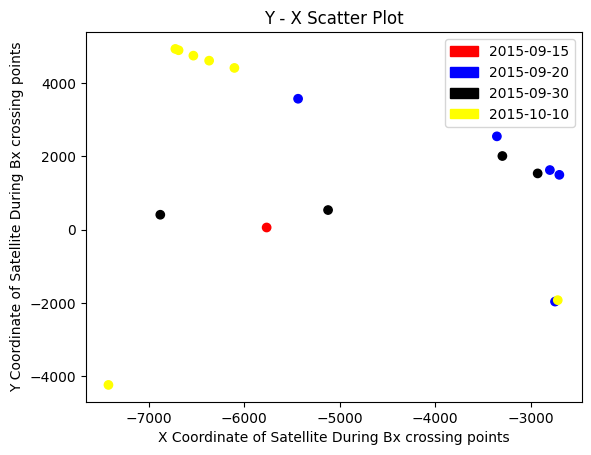

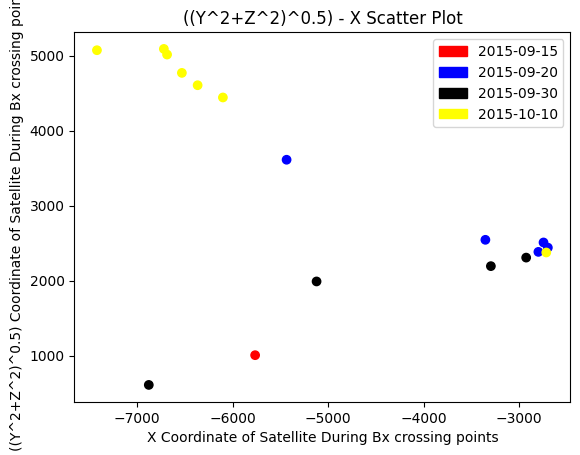

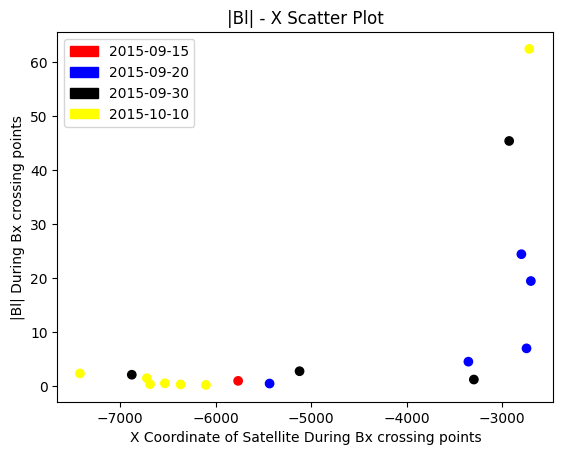

In [ ]:
# Plotting the scatter plots

"""
Indices of the bx crossing points
2015-09-15
Crossing point 67406: x = -5763.722, y = 55.255, z = -1005.466 |Bl| = 0.9933698893863887

2015-09-20
Crossing point 8130: x = -5434.253, y = 3566.323, z = -572.478 |Bl| = 0.49752064570406307
Crossing point 37654: x = -2743.531, y = -1965.364, z = -1560.241 |Bl| = 7.0064346518337555
Crossing point 53556: x = -3352.283, y = 2540.867, z = 139.59 |Bl| = 4.5446253007600355
Crossing point 54121: x = -2797.344, y = 1621.974, z = -1746.928 |Bl| = 24.429650757855683
Crossing point 54182: x = -2698.108, y = 1491.273, z = -1932.023 |Bl| = 19.462869600008762

2015-09-30
Crossing point 42766: x = -3294.803, y = 2004.641, z = -891.384 |Bl| = 1.2396758444323304
Crossing point 43029: x = -2925.257, y = 1530.053, z = -1727.342 |Bl| = 45.37432295348441
Crossing point 78339: x = -5120.325, y = 530.975, z = -1917.633 |Bl| = 2.7794637545153074
Crossing point 79467: x = -6877.354, y = 403.177, z = 458.482 |Bl| = 2.130206211262167

2015-10-10
Crossing point 35931: x = -7420.29, y = -4237.896, z = 2786.618 |Bl| = 2.3708007595029046
Crossing point 50442: x = -6101.209, y = 4406.949, z = -556.888 |Bl| = 0.24451886194549313
Crossing point 50767: x = -6365.873, y = 4605.069, z = 36.929 |Bl| = 0.3341194917857474
Crossing point 51027: x = -6530.874, y = 4742.037, z = 512.063 |Bl| = 0.5486965264182907
Crossing point 51358: x = -6685.949, y = 4888.92, z = 1112.636 |Bl| = 0.3859804364267602
Crossing point 51452: x = -6719.497, y = 4925.043, z = 1281.797 |Bl| = 1.4923685466122416
Crossing point 79162: x = -2714.825, y = -1926.114, z = -1390.941 |Bl| = 62.40339700554975
"""

x_2015_09_15 =  [-5763.722]
x_2015_09_20 = [-5434.253, -2743.531, -3352.283, -2797.344, -2698.108] 
x_2015_09_30 = [-3294.803, -2925.257, -5120.325, -6877.354]
x_2015_10_10 = [-7420.29, -6101.209, -6365.873, -6530.874, -6685.949, -6719.497, -2714.825]

###
y_2015_09_15 =  [55.255]
y_2015_09_20 = [3566.323, -1965.364, 2540.867, 1621.974, 1491.273] 
y_2015_09_30 = [2004.641, 1530.053, 530.975, 403.177]
y_2015_10_10 = [-4237.896, 4406.949, 4605.069, 4742.037, 4888.92, 4925.043, -1926.114]

z_2015_09_15 =  [-1005.466]
z_2015_09_20 = [-572.478, -1560.241, 139.59, -1746.928, -1932.023] 
z_2015_09_30 = [-891.384, -1727.342, -1917.633, 458.482]
z_2015_10_10 = [2786.618, -556.888, 36.929, 512.063, 1112.636, 1281.797, -1390.941]

bl_2015_09_15 =  [0.9933698893863887]
bl_2015_09_20 = [0.49752064570406307, 7.0064346518337555, 4.5446253007600355, 24.429650757855683, 19.462869600008762] 
bl_2015_09_30 = [1.2396758444323304, 45.37432295348441, 2.7794637545153074, 2.130206211262167]
bl_2015_10_10 = [2.3708007595029046, 0.24451886194549313, 0.3341194917857474, 0.5486965264182907, 0.3859804364267602, 1.4923685466122416, 62.40339700554975]


color_cross = ['red', 'blue','blue','blue','blue','blue', 'black','black','black','black', 'yellow', 'yellow','yellow', 'yellow','yellow', 'yellow','yellow']
color_scheme = ['red', 'blue', 'black', 'yellow']
date_cross = ["2015-09-15", "2015-09-20", "2015-09-30", "2015-10-10"]

import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(color_scheme, date_cross)]


x_cross = x_2015_09_15 + x_2015_09_20 + x_2015_09_30 + x_2015_10_10
y_cross = y_2015_09_15 + y_2015_09_20 + y_2015_09_30 + y_2015_10_10
z_cross = z_2015_09_15 + z_2015_09_20 + z_2015_09_30 + z_2015_10_10
bl_cross = bl_2015_09_15 + bl_2015_09_20 + bl_2015_09_30 + bl_2015_10_10

num = 17
yz_sqr = list(np.zeros(17))

for i in range(17):
    yz_sqr[i] = np.sqrt((y_cross[i]**2 + z_cross[i]**2))

plt.figure()
plt.scatter(x_cross, y_cross, color = color_cross)
plt.legend(handles=handles)
plt.title("Y - X Scatter Plot")
plt.xlabel("X Coordinate of Satellite During Bx crossing points")
plt.ylabel("Y Coordinate of Satellite During Bx crossing points")

# plt.legend(color = color_scheme, label = date_cross)
# plt.legend(["2015-09-15", "2015_09_20", "2015_09_30", "2015_10_10"],loc='upper right', shadow = True)

plt.figure()
plt.scatter(x_cross, yz_sqr, color = color_cross)
plt.legend(handles=handles)
plt.title("((Y^2+Z^2)^0.5) - X Scatter Plot")
plt.xlabel("X Coordinate of Satellite During Bx crossing points")
plt.ylabel("((Y^2+Z^2)^0.5) Coordinate of Satellite During Bx crossing points")

plt.figure()
plt.scatter(x_cross, bl_cross, color = color_cross)
plt.legend(handles=handles)
plt.title("|Bl| - X Scatter Plot")
plt.xlabel("X Coordinate of Satellite During Bx crossing points")
plt.ylabel("|Bl| During Bx crossing points")

